In [19]:
import pandas as pd
import numpy as np
import copy
    
import warnings
warnings.filterwarnings("ignore")

In [20]:
result_rf = pd.read_csv('Result/result_rf.csv', index_col=0)
result_mlp = pd.read_csv('Result/result_mlp.csv', index_col=0)
result_lasso = pd.read_csv('Result/result_lasso.csv', index_col=0)
result_lstm = pd.read_csv('Result/result_lstm.csv', index_col=0)

In [21]:
def triple_barier_labels(data,day_barrier, pct_barrier):
  label =  copy.deepcopy(data) * 0
  for i in range (day_barrier, 0, -1):
    temp = data.pct_change(i)
    flag = 0
    for x,v in enumerate(temp.index):
      if np.isnan(temp.loc[v]): continue
      if temp.loc[v] >= pct_barrier: 
        label.loc[v] = i
        flag +=1
      elif temp.loc[v] <= -0.1: 
        label.loc[v] = -i
        flag +=1
    # print(f"{i}: {flag}")
  return label


In [22]:
data = pd.DataFrame(columns=result_rf["Symbol"].unique(), index=result_rf.index.unique())
for symbol in data.columns:
  data[symbol] = result_rf['Close'][result_rf['Symbol'] == symbol]
data

,ACB,MBB,TCB,VCB,SSI,GVR,MSN,VHM,VIC,MWG,...,SSB,BVH,LPB,VJC,GAS,STB,HPG,HDB,VNM,BID
2023-11-30,15.40,15.14,14.30,56.66,24.44,19.82,60.5,41.30,41.75,38.20,...,19.89,38.11,12.20,102.0,69.61,27.50,20.11,14.41,61.16,32.11
2023-12-01,15.40,15.14,14.43,56.86,24.98,19.96,61.5,40.90,42.10,38.44,...,19.98,38.79,12.20,105.4,70.71,27.50,20.38,14.57,62.07,32.56
2023-12-04,15.65,15.36,14.64,57.53,26.23,20.41,62.2,41.30,42.95,39.63,...,20.03,39.08,12.20,105.8,71.89,28.20,20.83,14.81,62.43,32.89
2023-12-05,15.55,15.36,14.57,57.12,26.00,20.41,61.4,40.50,42.80,39.68,...,19.98,38.89,12.24,105.1,71.89,27.80,20.64,14.77,61.80,32.77
2023-12-06,15.65,15.40,14.74,57.46,26.23,20.61,62.1,40.45,42.80,40.63,...,19.98,39.13,12.56,105.8,72.62,28.10,20.91,14.89,62.16,33.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,21.85,23.00,26.50,62.54,25.85,32.45,67.6,40.25,40.60,58.40,...,19.65,58.70,34.28,96.6,68.60,39.40,23.08,23.45,61.62,41.10
2025-02-25,21.72,23.40,26.40,61.94,25.85,32.10,68.4,40.75,40.70,58.30,...,19.60,57.20,34.33,96.1,68.70,39.25,22.92,23.20,60.75,41.25
2025-02-26,21.68,23.20,26.30,61.74,25.85,32.60,68.3,40.70,41.00,58.70,...,19.30,57.80,34.37,97.1,68.40,38.55,23.12,23.05,60.94,41.20
2025-02-27,21.81,23.20,26.25,62.88,26.10,32.70,68.4,41.05,41.05,58.60,...,19.50,57.80,34.23,96.9,68.00,38.30,23.71,23.20,60.07,40.95


In [23]:
signal_rf = pd.DataFrame(columns=result_rf["Symbol"].unique(), index=result_rf.index.unique())
for symbol in data.columns:
  signal_rf[symbol] = result_rf['prediction'][result_rf['Symbol'] == symbol].values * (result_rf['signal_momentum']>0).astype(int)[result_rf['Symbol'] == symbol]

In [24]:
signal_mlp = pd.DataFrame(columns=result_mlp["Symbol"].unique(), index=result_mlp.index.unique())
for symbol in data.columns:
  signal_mlp[symbol] = result_mlp['prediction'][result_mlp['Symbol'] == symbol].values * (result_mlp['signal_momentum']>0).astype(int)[result_mlp['Symbol'] == symbol]

In [25]:
signal_lasso = pd.DataFrame(columns=result_lasso["Symbol"].unique(), index=result_lasso.index.unique())
for symbol in data.columns:
  signal_lasso[symbol] = result_lasso['prediction'][result_lasso['Symbol'] == symbol].values * (result_lasso['signal_momentum']>0).astype(int)[result_lasso['Symbol'] == symbol]

In [26]:
signal_lstm = pd.DataFrame(columns=result_lstm["Symbol"].unique(), index=result_lstm.index.unique())
for symbol in data.columns:
  signal_lstm[symbol] = result_lstm['prediction'][result_lstm['Symbol'] == symbol].values * (result_lstm['signal_momentum']>0).astype(int)[result_lstm['Symbol'] == symbol]

In [27]:
signal_momentum = pd.DataFrame(columns=result_mlp["Symbol"].unique(), index=result_mlp.index.unique())
for symbol in data.columns:
  signal_momentum[symbol] = (result_mlp['signal_momentum']>0).astype(int)[result_mlp['Symbol'] == symbol]

In [28]:
vol = pd.DataFrame(columns=result_rf["Symbol"].unique(), index=result_rf.index.unique())
for symbol in data.columns:
  vol[symbol] = result_rf['vol'][result_rf['Symbol'] == symbol]

In [ ]:
def Volatility_scale(data, volume, ignore_na=False, adjust = True, com = 60, min_periods=0):
    """Scale data using ex ante volatility"""

    # Lưu trữ index, tức thời gian 
    std_index = data.index

    daily_index = pd.DataFrame(index=std_index)

    # xét từng cổ phiếu
    for oo in data.columns:
        returns = data[oo]  # Lấy ra các return
        returns.dropna(inplace=True)  # xử lý null bằng zero

        returns = returns.rolling(2).apply(lambda x: x.iloc[1] / x.iloc[0] - 1)
        returns.iloc[0] =  0

        ret_index = (1 + returns).cumprod()
        
        vol = volume[oo]  
        # Join cum return và vol
        ret_index = pd.concat([ret_index, vol], axis=1)
        ret_index.columns = [oo, oo + '_Vol']  

        daily_index = pd.concat([daily_index, ret_index], join = 'outer' ,axis = 0)

    return daily_index


In [ ]:
def backtest(data,vol,signal,day_barrier = 20, pct_barrier = 0.03, vol_flag = 1, target_vol = 0.2, ignore_na = False, adjust = True, com = 60, min_periods = 0):
    
    pnl = pd.DataFrame(index=data.index)
    leverage = pd.DataFrame(index = data.index)

    company = signal.columns

    # gọi hàm Volatility scale
    daily_index = Volatility_scale(data,vol,ignore_na=ignore_na,
                          adjust=adjust,
                          com=com,   
                          min_periods = min_periods)


    # Volatility settings
    vol_flag = vol_flag    # Set flag to 1 for vol targeting
    if vol_flag == 1:
        target_vol = target_vol 
    else:
        target_vol = 'no target vol'
    

    for oo in company:
        
        df = pd.concat([daily_index[oo], daily_index[oo+"_Vol"]], axis=1)
        df = df.dropna(axis = 0, how = 'all')

        company_signal = signal[oo].dropna(axis = 0, how = 'all')
        df['pnl'] = 0. 
        df['leverage'] = 0.

        try:
            for x, v in enumerate(df['pnl']):
                if (company_signal.iloc[x]> 0.5).astype(int) == 1:
                    holding_time = abs(triple_barier_labels(df[oo].iloc[x:x+ day_barrier],day_barrier, pct_barrier)[0])
                    if holding_time == 0: holding_time = day_barrier
                    if vol_flag == 1:
                        vol = target_vol / (df[oo+"_Vol"].iloc[x - 1] + 1e-6)
                        df['pnl'].iloc[x + holding_time - 1] = (df[oo].iloc[x + holding_time - 1] / df[oo].iloc[x - 1] - 1) * \
                                vol + df['pnl'].iloc[x + holding_time - 1]
                        df['leverage'].iloc[x+holding_time] = vol + df['leverage'].iloc[x + holding_time]
                    else:
                        df['pnl'].iloc[x + holding_time - 1] = (df[oo].iloc[x + holding_time - 1] / df[oo].iloc[x - 1] - 1) + df['pnl'].iloc[x + holding_time - 1]
        except: pass

        leverage = pd.concat([leverage, df['leverage']], join = 'outer',axis = 1)
        pnl = pd.concat([pnl, df['pnl']], join = 'outer',axis=1)

    pnl.columns = signal.columns
    leverage.columns = signal.columns

    return [pnl,leverage]

In [ ]:
def backtest_fixed_h(data,vol,signal,k,h,  vol_flag = 1, target_vol = 0.2, ignore_na = False, adjust = True, com = 60, min_periods = 0):
    
    pnl = pd.DataFrame(index=data.index)
    leverage = pd.DataFrame(index = data.index)

    company = signal.columns

    daily_index = Volatility_scale(data,vol,ignore_na=ignore_na,
                          adjust=adjust,
                          com=com,   
                          min_periods = min_periods)


    # Volatility settings
    vol_flag = vol_flag   
    if vol_flag == 1:
        target_vol = target_vol 
    else:
        target_vol = 'no target vol'
    

    for oo in company:
        flag_h = 0
        flag_k = k+1
        df = pd.concat([daily_index[oo], daily_index[oo+"_Vol"]], axis=1)
        df = df.dropna(axis = 0, how = 'all')

        company_signal = signal[oo].dropna(axis = 0, how = 'all')
        df['pnl'] = 0. 
        df['leverage'] = 0.
        for x, v in enumerate(df['pnl']):
            if flag_h != 0:
                # Bỏ qua giai đoạn hold, tránh bị tính lặp lại
                flag_h = flag_h - 1
                continue
            # Bỏ qua thời gian cty chưa được lên sàn (nêu có)
            if df[oo].isnull().iloc[x] == False:
                try:
                    if company_signal.iloc[x] == -1:
                        for h_period in range(0,h):
                            if vol_flag == 1:
                                df['pnl'].iloc[x + h_period] = (1 - df[oo].iloc[x + h_period] / df[oo].iloc[x - 1 + h_period]) * \
                                    target_vol / df[oo+"_Vol"].iloc[x -1] 
                                df['leverage'].iloc[x + h_period] = target_vol / df[oo+"_Vol"].iloc[x -1]
                            else:
                                df['pnl'].iloc[x + h_period] = (1 - df[oo].iloc[x + h_period] / df[oo].iloc[x - 1 + h_period])
                                df['leverage'].iloc[x+h_period] = 1
                    elif company_signal.iloc[x] == 1:
                        for h_period in range(0,h):
                            if vol_flag == 1:
                                df['pnl'].iloc[x + h_period] = (df[oo].iloc[x + h_period] / df[oo].iloc[x - 1 + h_period] - 1) * \
                                        target_vol / df[oo+"_Vol"].iloc[x - 1]  
                                df['leverage'].iloc[x+h_period] = target_vol / df[oo+"_Vol"].iloc[x -1]
                            else:
                                df['pnl'].iloc[x + h_period] = (df[oo].iloc[x + h_period] / df[oo].iloc[x - 1 + h_period] - 1)
                                df['leverage'].iloc[x+h_period] = 1
                except:pass
            else: continue

            
            if signal[oo].iloc[x] == 1 or signal[oo].iloc[x] == -1 : flag_h = h - 1


        leverage = pd.concat([leverage, df['leverage']], join = 'outer',axis = 1)
        pnl = pd.concat([pnl, df['pnl']], join = 'outer',axis=1)

    pnl.columns = signal.columns
    leverage.columns = signal.columns
    pnl.fillna(0, inplace=True)
    leverage.fillna(0, inplace=True)

    return [pnl,leverage]

In [32]:
def strategy_daily_return(pnl):
    return pnl.mean(axis = 1)

In [ ]:
backtest_result = strategy_daily_return(backtest(data, vol, signal_rf,vol_flag=1, target_vol=0.1)[0])
backtest_result_mlp = strategy_daily_return(backtest(data, vol, signal_mlp, vol_flag=1, target_vol=0.1)[0])
backtest_result_lasso = strategy_daily_return(backtest(data, vol, signal_lasso, vol_flag=1, target_vol=0.1)[0])
backtest_result_lstm = strategy_daily_return(backtest(data, vol, signal_lstm,vol_flag=1, target_vol=0.1)[0])
backtest_result_momentum = strategy_daily_return(backtest(data, vol,signal_momentum, vol_flag=1, target_vol=0.1)[0])
backtest_result_momentum_fixed = strategy_daily_return(backtest_fixed_h(data, vol,signal_momentum, 30 , 20 ,vol_flag=1, target_vol=0.1)[0])

In [17]:
from vnstock import Vnstock

def VN_Index_data(start_time,end_time,interval = '1D'):
    stock = Vnstock().stock(symbol='ACB', source='VCI')
    stock_list = ['VN30']

    futures = pd.DataFrame()

    for ma_ck in stock_list:
        try:
            stock = Vnstock().stock(symbol= ma_ck, source='VCI')
            df = stock.quote.history(start= start_time, end= end_time, interval= interval)
            df = df.set_index('time')
            df = pd.DataFrame(df['close'])
            df.columns = [ma_ck]
            df.index = df.index.date
            futures = pd.concat([futures,df],axis = 1, join = 'outer').sort_index()
        except:
            continue

    if interval != '1D':
      futures['Date']= pd.to_datetime(futures.index, format='%Y-%m-%d')
    else:
      futures['Date'] = pd.to_datetime(futures.index, format='%Y-%m-%d %H:%M:%S')
    futures.set_index('Date', inplace=True)

    return futures

Phiên bản Vnstock 3.2.6 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 3.2.3

Phiên bản Vnai 2.1.9 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnai --upgrade`.
Lịch sử phiên bản: https://pypi.org/project/vnai/#history
Phiên bản hiện tại 2.0.2

In [18]:
start_time = '2023-12-28'
# start_time = '2023-12-31'
end_time = '2025-03-01'

Index = VN_Index_data(start_time, end_time)
Index = Index.pct_change()
Index.iloc[0] = 0
Index = Index[1:]


2025-07-20 08:20:57 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


In [19]:
backtest_result

2023-12-28    0.003642
2023-12-29    0.003040
2024-01-02    0.002613
2024-01-03    0.004023
2024-01-04    0.007835
                ...   
2025-02-24    0.009521
2025-02-25    0.007703
2025-02-26    0.006827
2025-02-27    0.006331
2025-02-28    0.006919
Length: 289, dtype: float64

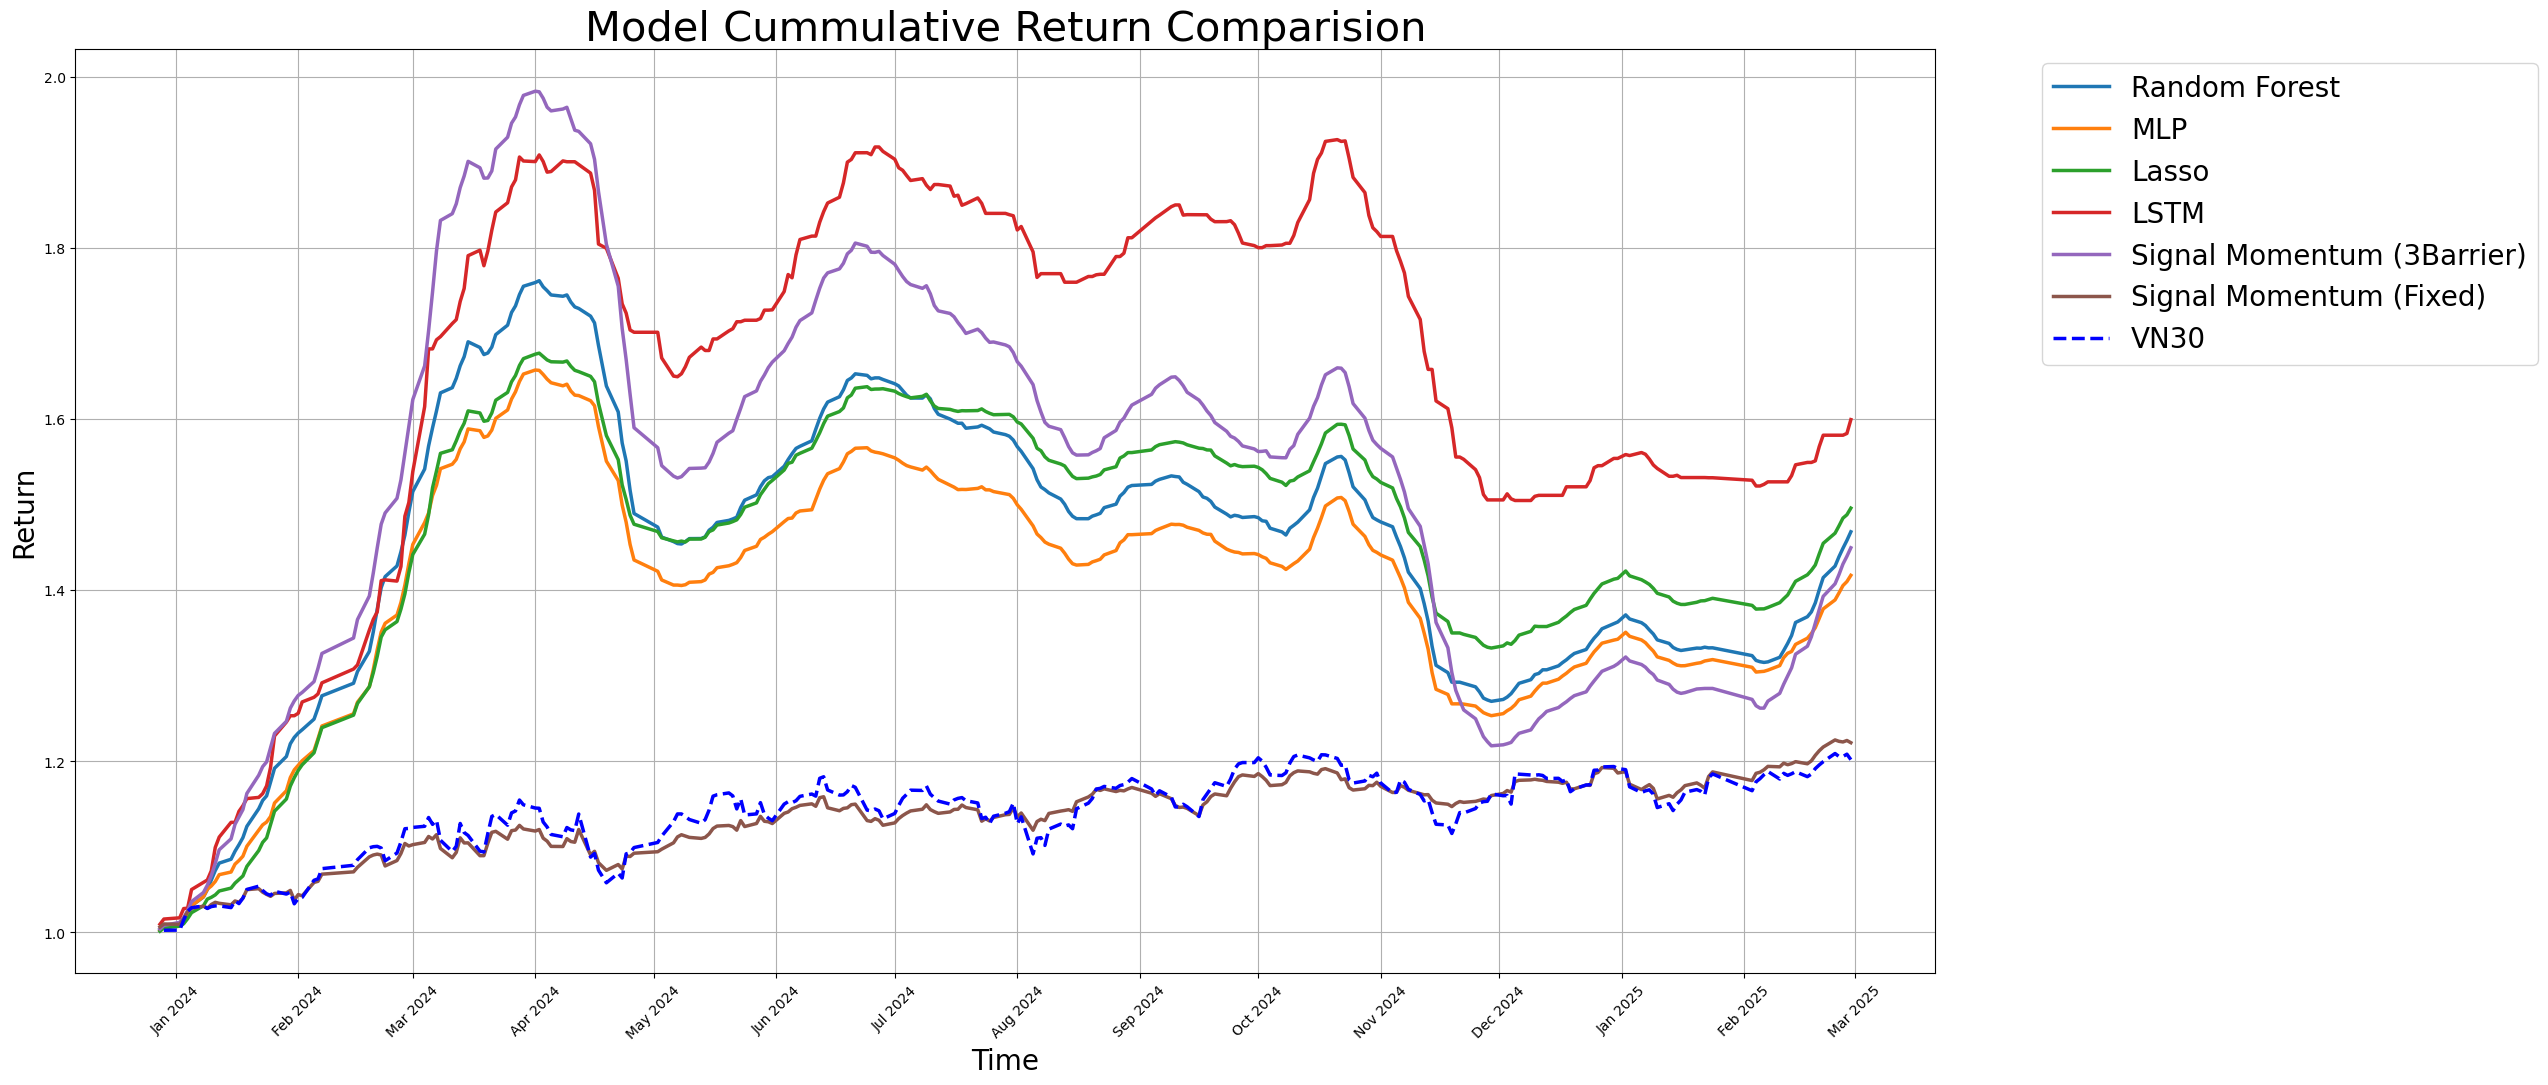

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(24, 12))

benchmark = (Index+1).cumprod()

cummulative_return = (backtest_result+1).cumprod()
cummulative_return.index = pd.to_datetime(cummulative_return.index)
ax.plot(cummulative_return, label = "Random Forest", linewidth = 2.5)

cummulative_return = (backtest_result_mlp+1).cumprod()
cummulative_return.index = pd.to_datetime(cummulative_return.index)
ax.plot(cummulative_return, label = "MLP", linewidth = 2.5)

cummulative_return_lasso = (backtest_result_lasso+1).cumprod() 
cummulative_return_lasso.index = pd.to_datetime(cummulative_return_lasso.index)
ax.plot(cummulative_return_lasso, label = "Lasso", linewidth = 2.5)

cummulative_return_lstm = (backtest_result_lstm+1).cumprod()
cummulative_return_lstm.index = pd.to_datetime(cummulative_return_lstm.index)
ax.plot(cummulative_return_lstm, label = "LSTM", linewidth = 2.5)

cummulative_return_momentum = (backtest_result_momentum+1).cumprod()
cummulative_return_momentum.index = pd.to_datetime(cummulative_return_momentum.index)
ax.plot(cummulative_return_momentum, label = "Signal Momentum (3Barrier)", linewidth = 2.5)


cummulative_return_momentum_fixed = (backtest_result_momentum_fixed+1).cumprod()
cummulative_return_momentum_fixed.index = pd.to_datetime(cummulative_return_momentum_fixed.index)
ax.plot(cummulative_return_momentum_fixed, label = "Signal Momentum (Fixed)", linewidth = 2.5)


ax.plot(benchmark, color = 'Blue', linewidth = 2.5, label = 'VN30', linestyle='--')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 20)
ax.set_xlabel("Time", fontsize = 20)
ax.set_ylabel("Return", fontsize = 20)

ax.xaxis.set_major_locator(mdates.MonthLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)


plt.title('Model Cummulative Return Comparision', fontsize = 30)
plt.grid()
plt.show()